<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3<br>
<font color=696880 size=4>
    Ashkan Majidi - Shayan Salehi - Amirhossein Alamdar

____

# Personal Data

In [2]:
student_number = '400105069'
first_name = 'محمدشایان'
last_name = 'شعبانی'

# Introduction

In this assignment, you will implement SVM (Support Vector Machines) for classification.


# Data Prepfocessing

Import your needed libraries in following cell.

In [1]:
# TODO: Write your code here
# ! pip install cvxopt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from cvxopt import matrix, solvers
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
import seaborn as sns

Load data from ```satimage``` dataset and split data to features and labels. The ```label``` column is our target variable. 

In [25]:
# TODO: Write your code here
file_path = 'Data/satimage.csv'
data = pd.read_csv(file_path)
print(data.head())

print('\n************************************\n')

print("info:")
print(data.info())

print('\n************************************\n')

print("description:")
print(data.describe())

      0         1         2         3         4         5          6       7  \
0   7.5  6.272730  4.047619  3.975208  3.032258  4.545455   8.421050  1.8125   
1   7.5  4.090909 -0.714290  1.776858  2.903226  3.090909   5.052630 -1.7500   
2  12.0  9.909090  8.333330  5.479339  3.354839  7.272730  10.526316  2.7500   
3   7.5  4.818182  1.190480  2.702482  2.774194  2.363640   5.894740 -0.2500   
4   7.5  4.818182  2.142860  2.702482  3.032258  3.090909   6.736840 -1.0000   

        8         9  ...        27        28        29        30        31  \
0 -2.2500  0.077672  ... -0.600000 -0.138462 -0.188119 -0.431579 -0.546875   
1 -2.2500  0.077672  ... -0.600000 -0.015385 -0.049505 -0.431579 -0.609375   
2  3.4375  6.368924  ... -0.233333  0.200000  0.207921 -0.010526 -0.312500   
3 -3.8750 -2.368924  ... -0.383333 -0.138462 -0.049505 -0.347368 -0.484375   
4 -0.6250 -1.320388  ... -0.183333  0.230769  0.267327 -0.031579 -0.281250   

        32        33        34        35  label  


Now split data to train, validation and test parts. 60% of data should be used for train, 15% for validation and 25% for test. After that scale the data to Standard Normal Distribution using ```StandardScaler``` class from ```scikit-learn``` library.

In [26]:
# TODO: Write your code here
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(3860, 36)
(3860,)
(966, 36)
(966,)
(1609, 36)
(1609,)


We want to train Binary SVM model for classification between labels 4 and 6. Choose corresponding datas and convert their lables to 1 and -1 respectively for 4 and 6.

In [27]:
# TODO: Write your code here
X_train = X_train[np.logical_or(y_train == 4, y_train == 6)]
X_val = X_val[np.logical_or(y_val == 4, y_val == 6)]
X_test = X_test[np.logical_or(y_test == 4, y_test == 6)]

y_train = y_train[np.logical_or(y_train == 4, y_train == 6)]
y_val = y_val[np.logical_or(y_val == 4, y_val == 6)]
y_test = y_test[np.logical_or(y_test == 4, y_test == 6)]

y_train = np.where(y_train == 4, -1, 1)
y_val = np.where(y_val == 4, -1, 1)
y_test = np.where(y_test == 4, -1, 1)

# Model (50 points)

Here is soft margin svm convex optimization formulation. 
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^N \xi_i \\
\text { Subject to } & y_i\left(\mathbf{w}^T \mathbf{x}_i+b\right) \geq 1-\xi_i, \quad i=1,2, \ldots, N \\
& \xi_i \geq 0, \quad i=1,2, \ldots, N
\end{aligned}
$$
write dual of the soft margin svm optimization problem below:

`TODO: Write Here`
Here is the dual form of the soft margin SVM optimization problem.
$$
\begin{aligned}
\text {Maximize} & \{ \sum_{n=1}^N \alpha_n -\frac{1}{2} \sum_{n=1}^N\ \sum_{m=1}^N \alpha_n \alpha_m y^{(n)} y^{(m)} x^{(n)^T} x^{(m)} \} \\
& \text {Subject to}\ \sum_{n=1}^N \alpha_n y^{(n)} = 0 \\
& 0 \leq \alpha_n \leq C\ \ \ \  n = 1, ..., N
\end{aligned}
$$

Now you should write this optimization problem in standard Quadratic Program (QP) form and use a QP solver to find optimal answer. Here is General form of a QP:
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2} x^TPx + q^Tx + r \\
\text { Subject to } & Gx \leq h \\
& Ax = b
\end{aligned}
$$

Complete functions below and use ```cvxopt``` library which is a common library for solving QPs. Note that you can't use ```scikit-learn``` library.


Here is the soft margin SVM optimization problem in the standard Quadratic Programming form:
$$
\begin{aligned}
\text{Minimize} & \quad \frac{1}{2} \mathbf{\alpha}^T \mathbf{P} \mathbf{\alpha} - \mathbf{1}_n^T \mathbf{\alpha} \\
\text{Subject to} & \quad \mathbf{\alpha} \leq \mathbf{C} \\
& \quad -\mathbf{\alpha} \leq 0 \\
& \quad \mathbf{y}^T \mathbf{\alpha} = 0 \\
\end{aligned}
$$
$$
where:
P_{nm} = y^{(n)} y^{(m)} x^{(n)^T} x^{(m)} 
$$

In [28]:
def soft_margin_svm(X, y, C):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    """    
    
    # TODO: Write your code here
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    K = X @ X.T
    P = matrix((np.outer(y, y) * K), tc='d')
    q = matrix((-np.ones((X.shape[0], 1))), tc='d')
    G = matrix((np.vstack((np.eye(X.shape[0]), np.eye(X.shape[0]) * (-1)))), tc='d')
    h = matrix((np.hstack((np.ones(X.shape[0]) * (C), np.zeros(X.shape[0])))), tc='d')
    A = matrix((y.reshape(1, -1)), tc='d')
    b = matrix(np.array([0.0]), tc='d')

    quadratic_optimized = solvers.qp(P, q, G, h, A, b)
    all_of_them = np.array(quadratic_optimized['x'])
    
    support = (all_of_them > 1e-5).flatten()

    support_vectors = X[support]
    support_vector_labels = y[support]
    support_vector_alphas = all_of_them[support]
    

    return support_vectors, support_vector_labels, support_vector_alphas

In [29]:
C = 1.0
support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X_train, y_train, C)

     pcost       dcost       gap    pres   dres
 0: -6.1852e+02 -3.4675e+03  2e+04  3e+00  2e-13
 1: -4.2345e+02 -2.3582e+03  3e+03  4e-01  1e-13
 2: -3.9431e+02 -7.8465e+02  5e+02  3e-02  8e-14
 3: -4.4349e+02 -5.6991e+02  1e+02  8e-03  7e-14
 4: -4.6341e+02 -5.3079e+02  7e+01  3e-03  7e-14
 5: -4.7097e+02 -5.1627e+02  5e+01  2e-03  7e-14
 6: -4.7752e+02 -5.0463e+02  3e+01  9e-04  8e-14
 7: -4.8218e+02 -4.9634e+02  1e+01  4e-04  8e-14
 8: -4.8583e+02 -4.9046e+02  5e+00  9e-05  8e-14
 9: -4.8713e+02 -4.8860e+02  1e+00  2e-05  8e-14
10: -4.8764e+02 -4.8793e+02  3e-01  4e-06  8e-14
11: -4.8774e+02 -4.8779e+02  5e-02  3e-07  8e-14
12: -4.8776e+02 -4.8777e+02  2e-03  1e-08  9e-14
13: -4.8777e+02 -4.8777e+02  2e-04  3e-10  8e-14
Optimal solution found.


In [6]:
def predict_labels(x_test, support_vectors, support_vector_labels, support_vector_alphas):
    """
    input:
        x_test: test data
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    output:
        y_pred: predictoin labels
    """
    
    # TODO: Write your code here
    
    y_pred = []
    for x in x_test:
        prediction = sum(np.dot(support_vector, x) * support * support_label for support_vector, support, support_label in zip(support_vectors, support_vector_alphas, support_vector_labels))
        y_pred.append(np.sign(prediction))
    y_pred = np.array(y_pred).astype(int)
    return y_pred

In [31]:
y_pred = predict_labels(np.array(X_test), support_vectors, support_vector_labels, support_vector_alphas)

# Evaluation (20 points)

Compute accuracy, balanced accuracy and plot confusion matrix of your trained model using ```Seaborn.heatmap()``` function. Use case of balanced accuracy is when dealing with imbalanced data, i.e. when one of the target classes appears a lot more than the other and it is defined by average of recall of classes. Confusion matrix is a $k\times k$ (k is number of classes) matrix which cell ij is showing that number of data points labeld i which predicted j. For more detail of evaluation metrics you can see [here](https://neptune.ai/blog/balanced-accuracy).

You may use ```scikit-learn``` library to compute these metrics.

In [5]:
def evaluate(y_test, y_pred):
    """
    input:
        y_test: true labels
        y_pred: predicted labels
    output:
        accuracy: accuracy of the model
        balanced_accuracy: balanced accuracy of the model
        confusion_matrix: confusion matrix of the model
    """
    # TODO: Write your code here

    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("Accuracy: ", accuracy)
    print("Balanced Accuracy: ", balanced_accuracy)
    print("Confusion Matrix:\n", confusion_mat)
    return accuracy, balanced_accuracy, confusion_mat


_, _, confusion_matrix_feed = evaluate(y_test, y_pred)

<Axes: >

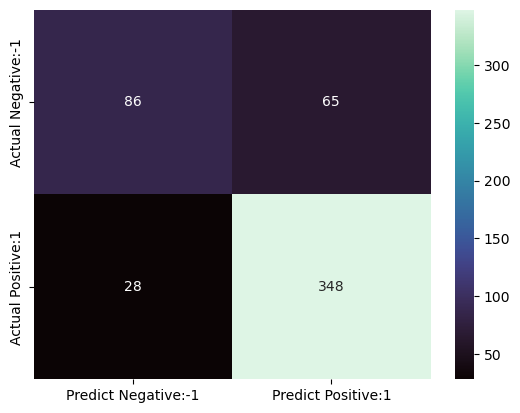

In [33]:
confusion_matrix_plot = pd.DataFrame(data=confusion_matrix_feed, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(confusion_matrix_plot, annot=True, fmt='d', cmap='mako')

# Fine-tunning (40 points)

like what you did before, implement Soft Margin SVM but now use rbf kernel. To determine rbf $\gamma$ parameter use validation datas and find best(best by balanced accuracy) $\gamma$ between 0.001 , 0.01, 1, 10, 100. Not that you can't use ```scikit-learn``` library here.

In [4]:
def rbf(x1, x2, gamma=1):
    """
    input:
        x1: first vector
        x2: second vector
        gamma: rbf kernel parameter with defalt value 1.
    output:
        ouput: computed rbf of two input vectors
    """
    # TODO: Write your code here
    distance_squared = np.sum((x1 - x2) ** 2)
    output = np.exp(-gamma * distance_squared)
    return output

def soft_margin_svm(X, y, C, gamma=1):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
        gamma: rbf kernel parameter with defalt value 1.
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    """

    # TODO: Write your code here

    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    
    K = np.array([[rbf(X[i], X[j], gamma) for j in range(X.shape[0])] for i in range(X.shape[0])])
    
    P = matrix((np.outer(y, y) * K), tc='d')
    q = matrix((-np.ones((X.shape[0], 1))), tc='d')
    G = matrix((np.vstack((np.eye(X.shape[0]), np.eye(X.shape[0]) * (-1)))), tc='d')
    h = matrix((np.hstack((np.ones(X.shape[0]) * (C), np.zeros(X.shape[0])))), tc='d')
    A = matrix((y.reshape(1, -1)), tc='d')
    b = matrix(np.array([0.0]), tc='d')

    quadratic_optimized = solvers.qp(P, q, G, h, A, b)
    all_of_them = np.array(quadratic_optimized['x'])
    
    support = (all_of_them > 1e-5).flatten()

    support_vectors = X[support]
    support_vector_labels = y[support]
    support_vector_alphas = all_of_them[support]

    return support_vectors, support_vector_labels, support_vector_alphas

In [36]:
gammas = [0.01, 0.1, 1, 10, 100]
best_gamma = None
best_support_vectors = None
best_support_vector_labels = None
best_support_vector_alphas = None
best = 0
# TODO: Write your code here

for gamma in gammas:
    
    print(f'gamma = {gamma}')
    support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X_train, y_train, C, gamma)
    y_pred = predict_labels(X_val, support_vectors, support_vector_labels, support_vector_alphas)
    accuracy = balanced_accuracy_score(y_val, y_pred)
    
    if best <= accuracy:
        best = accuracy
        best_gamma = gamma
        best_support_vectors = support_vectors
        best_support_vector_alphas = support_vector_alphas
        best_support_vector_labels = support_vector_labels
        
print('The best gamma is:')
print(best_gamma)

gamma = 0.01
     pcost       dcost       gap    pres   dres
 0: -5.9017e+02 -3.2625e+03  2e+04  3e+00  1e-14
 1: -4.1635e+02 -2.1183e+03  2e+03  2e-01  7e-15
 2: -4.2989e+02 -7.0735e+02  3e+02  2e-02  5e-15
 3: -4.7939e+02 -5.9408e+02  1e+02  6e-03  6e-15
 4: -4.9960e+02 -5.5734e+02  6e+01  3e-03  6e-15
 5: -5.1133e+02 -5.3668e+02  3e+01  9e-04  6e-15
 6: -5.1645e+02 -5.2854e+02  1e+01  4e-04  6e-15
 7: -5.2008e+02 -5.2313e+02  3e+00  8e-05  7e-15
 8: -5.2113e+02 -5.2166e+02  5e-01  9e-06  7e-15
 9: -5.2136e+02 -5.2138e+02  2e-02  2e-07  8e-15
10: -5.2137e+02 -5.2137e+02  7e-04  6e-09  8e-15
11: -5.2137e+02 -5.2137e+02  3e-05  2e-10  8e-15
Optimal solution found.
gamma = 0.1
     pcost       dcost       gap    pres   dres
 0: -3.7492e+02 -3.0663e+03  2e+04  3e+00  6e-15
 1: -2.7179e+02 -1.9129e+03  2e+03  2e-01  3e-15
 2: -2.8828e+02 -5.6833e+02  3e+02  2e-02  2e-15
 3: -3.2265e+02 -4.3929e+02  1e+02  7e-03  2e-15
 4: -3.4156e+02 -3.8250e+02  4e+01  2e-03  2e-15
 5: -3.4884e+02 -3.647

In [19]:
y_pred = predict_labels(np.array(X_test), best_support_vectors, best_support_vector_labels, best_support_vector_alphas)
_, _, confusion_mat = evaluate(y_test, y_pred)

Accuracy:  0.8026565464895635
Balanced Accuracy:  0.7329065097928702
Confusion Matrix:
 [[ 86  65]
 [ 39 337]]


# Multiclass SVM (30 points + 50 points optional)

Now we want implement Multiclass SVM. Use ```SVC``` function with rbf kernel from ```scikit-learn``` package on all train datas (all six classes) and choose best hyperparameters for $C$ and $\gamma$ between 0.01, 0.1, 1, 10, 100. After that evaluate it with your function.

Note that in this example we had enough data to split them in train and validation but in case that we don't have enough data, ```scikit-learn``` has a built-in fast library named ```GridSearchCV()``` which can help us in hyperparameter tunning with cross validation.

Accuracy:  0.906832298136646


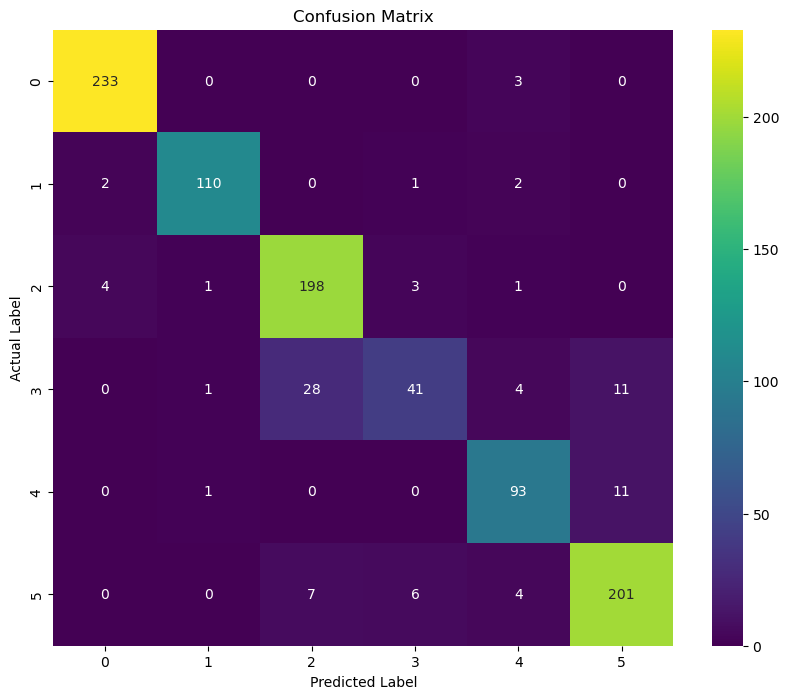

In [12]:
from sklearn.pipeline import Pipeline
import joblib
from joblib import dump, load

Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10, 100]

# TODO: Write your code here
file_path = 'Data/satimage.csv'
data = pd.read_csv(file_path)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

param_grid = {'svc__C': Cs, 'svc__gamma': gammas}

pipe = Pipeline([('svc', SVC(kernel='rbf'))])

grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

joblib.dump(grid_search, 'model.pkl')

model = joblib.load('model.pkl')

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

confusion_matrix_feed = confusion_matrix(y_test, y_pred)

confusion_matrix_plot = pd.DataFrame(data=confusion_matrix_feed)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_plot, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Implement Multiclass SVM from scratch without using ready functions (optional).

     pcost       dcost       gap    pres   dres
 0:  1.4005e-12 -5.4690e+03  2e+04  1e+00  1e-15
 1: -2.9474e-13 -1.4188e+03  2e+03  1e-02  7e-16
 2: -4.8925e-15 -1.4327e+01  2e+01  1e-04  4e-16
 3: -4.8588e-17 -1.4327e-01  2e-01  1e-06  4e-16
 4: -4.8583e-19 -1.4327e-03  2e-03  1e-08  6e-16
 5: -4.8583e-21 -1.4327e-05  2e-05  1e-10  3e-16
 6: -4.8583e-23 -1.4327e-07  2e-07  1e-12  4e-16
 7: -4.8583e-25 -1.4327e-09  2e-09  1e-14  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6850e+03 -9.0059e+03  2e+04  1e+00  1e-15
 1: -1.5987e+03 -4.7800e+03  3e+03  1e-13  4e-16
 2: -1.6520e+03 -1.8534e+03  2e+02  5e-14  6e-16
 3: -1.6872e+03 -1.6932e+03  6e+00  1e-13  2e-16
 4: -1.6883e+03 -1.6887e+03  3e-01  1e-13  2e-16
 5: -1.6884e+03 -1.6884e+03  2e-02  5e-14  2e-16
 6: -1.6884e+03 -1.6884e+03  6e-04  4e-15  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.0577e+02 -8.3414e+03  3e+04  2e+00  1e-15
 1: -8.2630e+02 -3.9340e

C:\Users\KASRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy:  0.7070393374741201
Balanced Accuracy:  0.7332431334934695
Confusion Matrix:
 [[  0   0   0   0   0   0   0]
 [  0 233   0   0   0   3   0]
 [  1   1 107   0   1   5   0]
 [  2   5   0 194   6   0   0]
 [  2   0   1  23  56   3   0]
 [  7   1   1   1   2  93   0]
 [162   0   1   3  41  11   0]]


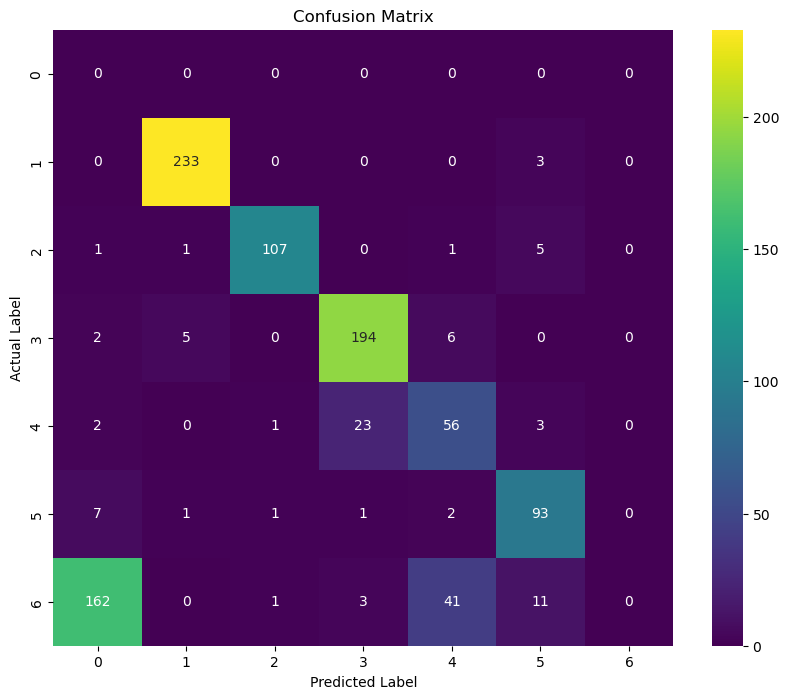

In [9]:
data = pd.read_csv(file_path)

X = data.drop(columns=['label']).values
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

C = 1
gamma = 1

# TODO: Write your code here
def predict_multi_class(X_test, classifiers, gamma):
    
    predictions = np.ones((len(X_test), len(classifiers)))
    for i, (support_vectors, support_vector_labels, support_vector_alphas) in enumerate(classifiers):
        for j in range(len(X_test)):
            predictions[j, i] = sum(rbf(X_test[j], support_vector, gamma) * support * support_label for support_vector, support, support_label in zip(support_vectors, support_vector_alphas, support_vector_labels))
            
    y_pred = np.argmax(predictions, axis=1)
    
    return y_pred


classifiers = []


for label in range(6):

    indices = np.where(y_train == label, 1, -1)

    support_vectors, support_vector_labels, support = soft_margin_svm(X_train, indices, C, gamma)
    
    classifiers.append((support_vectors, support_vector_labels, support))

y_pred = predict_multi_class(X_test, classifiers, gamma)

_, _, confusion_matrix_feed = evaluate(y_test, y_pred)

confusion_matrix_plot = pd.DataFrame(data=confusion_matrix_feed)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_plot, annot=True, fmt='d', cmap='viridis')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Different SVM Kernels (40 points)

A kernel in SVM is like a tool that helps solve tricky problems. It lets us work in a space with many dimensions, making complex calculations easier. With kernels, we can deal with lots of dimensions, even an endless amount. Kernels are crucial for sorting data into groups and help spot patterns in the data we're looking at. They're especially good at tackling twisty problems with a straightforward approach.

Sometimes, finding a straight line or flat surface to divide data isn't possible, especially as we explore more dimensions. That's where different types of SVM kernels come in handy. They transform twisty, complicated data into a simpler form that's easier to separate. In this explanation, we talk about 4 popular types of these kernels. Also in following cells you can use any package.

<img src="./kernel.jpg" alt="Types of Kernel Functions"  align=center class="saturate">

### Linear Kernel

This is the simplest kind of kernel, typically working in one dimension. It works best when dealing with a lot of features. Linear kernels are quicker than other types.

**Formula:**

$$F(x, x_j) = sum(x, x_j)$$

Now Implement svc classifier using a linear kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix by `Seaborn`.

Accuracy:  0.8840579710144928
Balanced Accuracy:  0.8377094020425097
Confusion Matrix:
 [[234   0   0   0   2   0]
 [  1 109   0   0   5   0]
 [  3   1 198   4   1   0]
 [  2   0  27  39   4  13]
 [  1   4   0   2  84  14]
 [  0   0   5  16   7 190]]
Accuracy: 0.8840579710144928


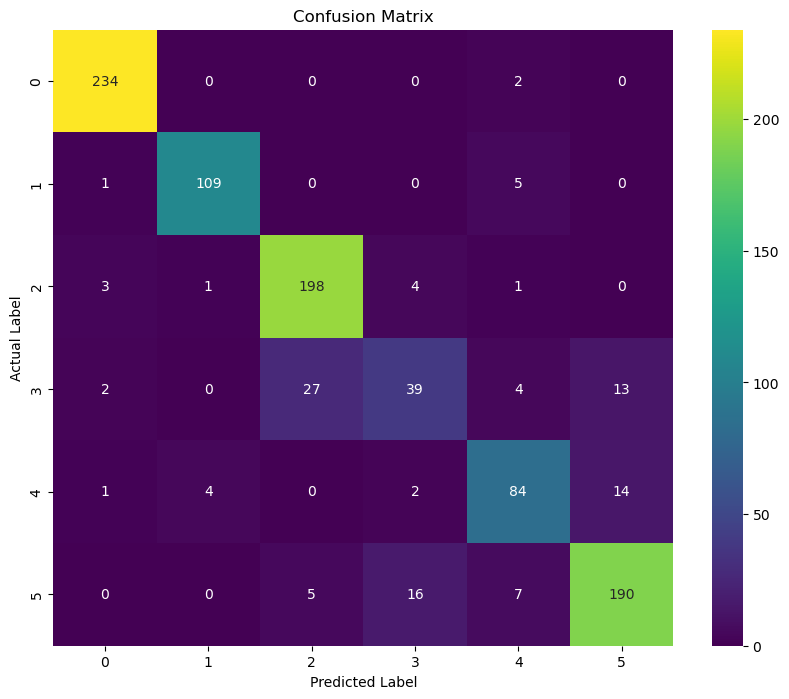

In [13]:
# TODO: Write your code here
y_train = np.reshape(y_train, -1)
y_test = np.reshape(y_test, -1)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy, _, confusion_matrix_feed = evaluate(y_test, y_pred)
confusion_matrix_plot = pd.DataFrame(data=confusion_matrix_feed)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_plot, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
print("Accuracy:", accuracy)
plt.show()

### Gaussian RBF kernel

This kernel is a favorite choice in SVM, especially for data that doesn't line up straight. It's great for sorting data when you don't know much about it beforehand.

**Formula:**

$$F(x, x_j) = \exp{(-\gamma ||x - xj||^2)}$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous part. 

Accuracy:  0.8726708074534162
Balanced Accuracy:  0.8253414486871177
Confusion Matrix:
 [[233   0   1   0   2   0]
 [  1 108   0   0   5   1]
 [  3   0 197   5   0   2]
 [  0   0  30  39   4  12]
 [  4   2   0   0  80  19]
 [  0   1   6  18   7 186]]
Accuracy: 0.8726708074534162


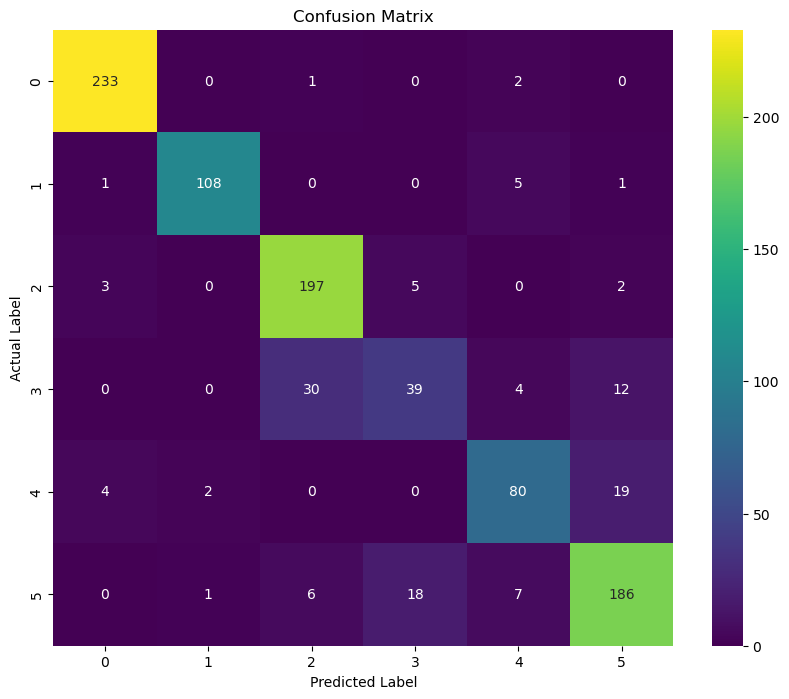

In [14]:
# TODO: Write your code here
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy, _, confusion_matrix_feed = evaluate(y_test, y_pred)
confusion_matrix_plot = pd.DataFrame(data=confusion_matrix_feed)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_plot, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
print("Accuracy:", accuracy)
plt.show()

### Polynomial Kernel

This is a broader version of the linear kernel. It's not as popular because it's not as quick or precise.

**Formula:**

$$F(x, x_j) = (x.x_j+1)^d$$

Now, set up the SVC classifier using a *polynomial* kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

Accuracy:  0.8695652173913043
Balanced Accuracy:  0.8152233057866476
Confusion Matrix:
 [[233   0   0   0   2   1]
 [  2 105   0   1   7   0]
 [  4   0 193   7   1   2]
 [  1   0  25  35   3  21]
 [  1   1   0   0  79  24]
 [  0   1   6  11   5 195]]
Accuracy: 0.8695652173913043


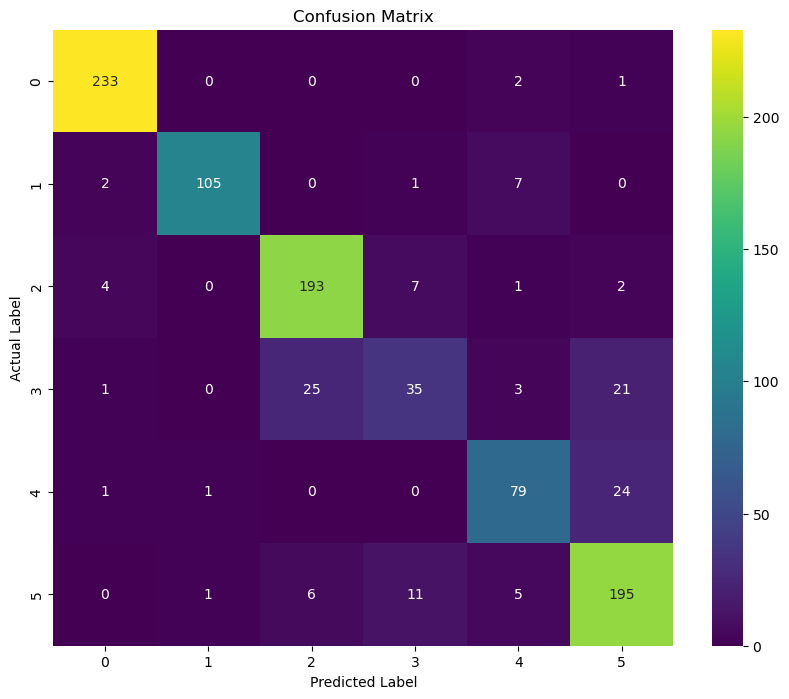

In [15]:
# TODO: Write your code here
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy, _, confusion_matrix_feed = evaluate(y_test, y_pred)
confusion_matrix_plot = pd.DataFrame(data=confusion_matrix_feed)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_plot, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
print("Accuracy:", accuracy)
plt.show()

### Sigmoid Kernel

This is mainly chosen for use with neural networks. The kernel function acts like the activation function in a two-layer perceptron neural network model, helping to activate the neurons.

**Formula:**

$$F(x, x_j) = \tanh(α x a y + c)$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts. 

Accuracy:  0.5755693581780539
Balanced Accuracy:  0.5203229779198124
Confusion Matrix:
 [[170   0  59   0   6   1]
 [  7  80   8   0  20   0]
 [ 53   0 117  21  16   0]
 [  1   0  79   1   1   3]
 [  9  11  14   0  54  17]
 [  2   0  75   0   7 134]]
Accuracy: 0.5755693581780539


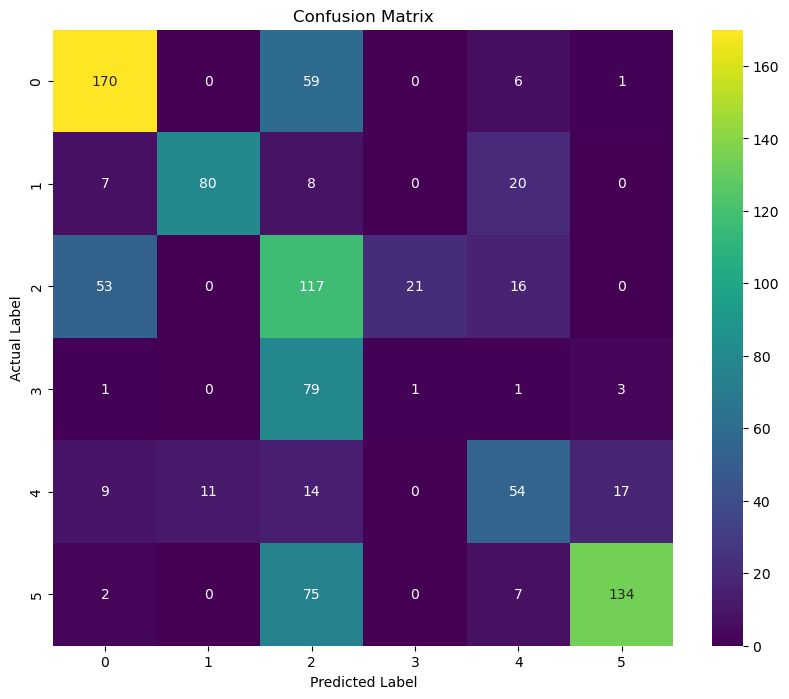

In [16]:
# TODO: Write your code here
svm = SVC(kernel='sigmoid')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy, _, confusion_matrix_feed = evaluate(y_test, y_pred)
confusion_matrix_plot = pd.DataFrame(data=confusion_matrix_feed)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_plot, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
print("Accuracy:", accuracy)
plt.show()

Compare these four kernel functions with each other. What are the main advantages and disadvantages of each one? 

`TODO: Write Here`
**Linear Kernel**: Simple and suitable for linearly separable data but not suitable for complex datasets
**Gaussian Kernel**: Handles non-linear models but may overfit
**Polynomial Kernel**: Handles non-linear models and also it is flexible, but choosing the right degree is difficult, also when the degree increases, it becomes computationally expensive
**Sigmoid Kernel**: Can sometimes be used as a proxy for Neural Networks, but might sometimes lead to poorer results due to its lack of satisfying Mercer's Condition all the time.